## Mini Project: Exploratory Data Analysis

The information on the Internet is truly unending. E-commerce and review websites are teeming with untapped data that has the potential to be transformed into insightful knowledge that can support sound decision-making. In this project, I am going to use my knowledge of EDA to dig dip into the Google Playstore dataset. The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. I got the the dataset here https://www.kaggle.com/datasets/lava18/google-play-store-apps 


Insights I want to draw from this dataset
1. Collect the basic information about your data 
2. What category has the most app?
3. What are the number of apps with 4+ star rating
4. What are the top 4 choice apps for teenagers? Display the ratings of the Apps with the appropriate chart
5. What are the top 5 apps prefered by teengers in the Game category?
6. What is the most expensive app in the playstore?
7. What is the average rating per category? Dispay the top ten apps with respect to their average ratings
8. Using Pivot table, find the average rating and highest price per category
9. What is the percentage market share of each app by category? Visualize the output using the appropriate chart
10. How is the installation distributed? 

In [1]:
# import the neccesary libraries first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

googleplaystore_df = pd.read_csv("googleplaystore.csv")

In [2]:
# Get the overall summary in the data
googleplaystore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [3]:
# Display first rows
googleplaystore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# Display last rows
googleplaystore_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
# Random rows of data
googleplaystore_df.sample(7)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4027,Let us C - Example Programs,FAMILY,4.3,36,1.1M,"5,000+",Free,0,Everyone,Education,"August 30, 2017",1.2,3.0 and up
6889,Allsetra B.V.,BUSINESS,4.1,15,24M,"1,000+",Free,0,Everyone,Business,"April 5, 2018",3.1.2,4.3 and up
3738,"Topbuzz: Breaking News, Videos & Funny GIFs",NEWS_AND_MAGAZINES,4.7,175110,25M,"10,000,000+",Free,0,Mature 17+,News & Magazines,"August 6, 2018",6.7.3,4.0 and up
9115,Currency Exchange DZ,FINANCE,NaN,4,2.5M,"1,000+",Free,0,Everyone,Finance,"November 10, 2016",1.0,2.3 and up
3322,FREEDOME VPN Unlimited anonymous Wifi Security,TOOLS,4.3,39833,9.9M,"1,000,000+",Free,0,Everyone,Tools,"July 9, 2018",2.5.1.7592,4.0.3 and up
7920,Family Savings CU Mobile,FINANCE,4.3,323,17M,"10,000+",Free,0,Everyone,Finance,"September 8, 2017",4.4.47,4.0.3 and up
4325,Love Balls,FAMILY,4.2,357049,40M,"50,000,000+",Free,0,Everyone,Puzzle,"July 31, 2018",1.2.7,4.1 and up


In [6]:
# Summary for numeric column
googleplaystore_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
# Summary for categorical columns
googleplaystore_df.describe(include="object")

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [8]:
googleplaystore_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Data Cleaning


In [9]:
# Let's drop some columns
columns_to_drop = ['Current Ver', 'Android Ver','Last Updated']
googleplaystore_df.drop(columns_to_drop, axis=1, inplace=True)

In [10]:
googleplaystore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [11]:
# Treating the missing values
#Rating column
googleplaystore_df['Rating'].fillna(googleplaystore_df['Rating'].mean(),inplace=True)

# Type
googleplaystore_df['Type'].fillna(method='ffill',inplace=True)

#Content Rating
googleplaystore_df['Content Rating'].fillna(method='ffill',inplace=True)

In [12]:
googleplaystore_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [13]:
Category = googleplaystore_df['Category']
Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [14]:
# Noticed wrong values in row 10472
googleplaystore_df.loc[10468:10477, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
10468,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,"50,000+",Free,0,Everyone,Lifestyle
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018"
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools
10476,Lennox iComfort Wi-Fi,LIFESTYLE,3.0,552,7.6M,"50,000+",Free,0,Everyone,Lifestyle
10477,Sci-Fi Sounds and Ringtones,PERSONALIZATION,3.6,128,11M,"10,000+",Free,0,Everyone,Personalization


In [15]:
# Drop row 10472
googleplaystore_df.drop(labels=[10472],inplace=True)         

In [16]:
googleplaystore_df.shape[0]

10840

In [17]:
# Change Review, Size, Price and Installs dataframe from object to int or float and do the necessary conversions
googleplaystore_df['Reviews'] = pd.to_numeric(googleplaystore_df['Reviews'], errors='coerce')

In [18]:
googleplaystore_df['Size'] = googleplaystore_df.Size.apply(lambda x: x.strip('+'))# Removing the + Sign
googleplaystore_df['Size'] = googleplaystore_df.Size.apply(lambda x: x.replace(',', ''))# For removing the `,`
googleplaystore_df['Size'] = googleplaystore_df.Size.apply(lambda x: x.replace('M', 'e+6'))# For converting the M to Mega
googleplaystore_df['Size'] = googleplaystore_df.Size.apply(lambda x: x.replace('k', 'e+3'))# For converting the K to Kilo
googleplaystore_df['Size'] = googleplaystore_df.Size.replace('Varies with device', np.NaN)
googleplaystore_df['Size'] = pd.to_numeric(googleplaystore_df['Size']) # Converting the string to Numeric type

In [19]:
googleplaystore_df['Price'] = googleplaystore_df.Price.apply(lambda x: x.strip('$'))
googleplaystore_df['Price'] = googleplaystore_df.Price.apply(lambda x: x.replace('Everyone', '0'))
googleplaystore_df['Price'] = pd.to_numeric(googleplaystore_df['Price'])

In [20]:
googleplaystore_df['Installs'] = googleplaystore_df.Installs.apply(lambda x: x.strip('+'))
googleplaystore_df['Installs'] = googleplaystore_df.Installs.apply(lambda x: x.replace(',', ''))
googleplaystore_df['Installs'] = googleplaystore_df.Installs.apply(lambda x: x.replace('Free', '0'))
googleplaystore_df['Installs'] = pd.to_numeric(googleplaystore_df['Installs'])

In [21]:
googleplaystore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 931.6+ KB


In [22]:
googleplaystore_df.describe()

,Rating,Reviews,Size,Installs,Price
count,10840.000000,1.084000e+04,9.145000e+03,1.084000e+04,10840.000000
mean,4.191972,4.441529e+05,2.151653e+07,1.546434e+07,1.027368
std,0.478907,2.927761e+06,2.258875e+07,8.502936e+07,15.949703
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,4.900000e+06,1.000000e+03,0.000000
50%,4.200000,2.094000e+03,1.300000e+07,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,3.000000e+07,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


### Querying the Data to answer Analytic Question


In [48]:
# What category has the most app?
highest_category = googleplaystore_df["Category"].value_counts()
highest_category

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [24]:
# What are the number of apps with 4+ star rating
App_rating = googleplaystore_df[googleplaystore_df.Rating>4.0]
App_rating

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19000000.0,10000,Free,0.0,Everyone,Art & Design
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity
5,Paper flowers instructions,ART_AND_DESIGN,4.400000,167,5600000.0,50000,Free,0.0,Everyone,Art & Design
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53000000.0,5000,Free,0.0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3600000.0,100,Free,0.0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,4.193338,3,9500000.0,1000,Free,0.0,Everyone,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference


In [25]:
print(f"The number of Apps with 4+ rating is {App_rating.shape[0]}")

The number of Apps with 4+ rating is 8274


In [26]:
# What are the top 4 choice apps for teenagers? Display the ratings of the Apps with the appropriate chart
#Teenchoice
top4teenchoice = googleplaystore_df[googleplaystore_df['Content Rating'] == 'Teen'].sort_values(by='App', ascending=False).head(4)
top4teenchoice

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
5698,日本AV历史,BOOKS_AND_REFERENCE,4.1,215,30000000.0,10000,Free,0.0,Teen,Books & Reference
5569,【Miku AR Camera】Mikuture,FAMILY,4.4,36268,41000000.0,1000000,Free,0.0,Teen,Entertainment
7751,الفاتحون Conquerors,FAMILY,4.5,108130,40000000.0,5000000,Free,0.0,Teen,Strategy
8644,wikiHow: how to do anything,BOOKS_AND_REFERENCE,4.4,43088,3000000.0,1000000,Free,0.0,Teen,Books & Reference


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 21382 (\N{CJK UNIFIED IDEOGRAPH-5386}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 21490 (\N{CJK UNIFIED IDEOGRAPH-53F2}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 12304 (\N{LEFT BLACK LENTICULAR BRACKET}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DELL\ana

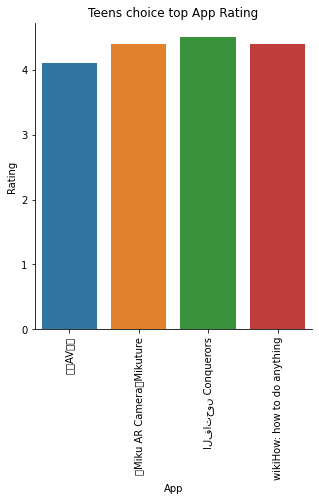

In [27]:
# Visualizing the ratings of the App
ax = sns.catplot(x = "App",
            y = "Rating",
           kind ="bar",
           data = top4teenchoice,
           )
ax.set_xlabels("App")
ax.set_ylabels("Rating")
ax.set_xticklabels(rotation=90)
plt.title("Teens choice top App Rating")

plt.show()

In [28]:
# What are the top 5 apps prefered by teengers in the Game category?
DatingApp_teen = googleplaystore_df[(googleplaystore_df['Category'] == 'GAME') & (googleplaystore_df['Content Rating'] == "Teen")]
DatingApp_teen.sort_values(by= "Installs", ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
1957,Bus Rush: Subway Edition,GAME,4.1,753043,57000000.0,100000000,Free,0.0,Teen,Action
1758,Hungry Shark Evolution,GAME,4.5,6074334,100000000.0,100000000,Free,0.0,Teen,Arcade
5417,Mobile Legends: Bang Bang,GAME,4.4,8219586,99000000.0,100000000,Free,0.0,Teen,Action
1949,Garena Free Fire,GAME,4.5,5476569,53000000.0,100000000,Free,0.0,Teen,Action
1915,Garena Free Fire,GAME,4.5,5476569,53000000.0,100000000,Free,0.0,Teen,Action


In [41]:
# What is the most expensive app in the playstore?
topPaidApp = googleplaystore_df[googleplaystore_df['Type'] =='Paid'][googleplaystore_df["Price"]== googleplaystore_df["Price"].max()]
topPaidApp

C:\Users\DELL\AppData\Local\Temp\ipykernel_9120\278654280.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  topPaidApp = googleplaystore_df[googleplaystore_df['Type'] =='Paid'][googleplaystore_df["Price"]== googleplaystore_df["Price"].max()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,10000,Paid,400.0,Everyone,Lifestyle


In [30]:
# Average rating per category

#Grouping the App by Category and get the mean
avg_rating = googleplaystore_df.groupby("Category").mean()
# Sort the dataframe using Rating
topten_avgrating = avg_rating.sort_values(by="Rating", ascending=False).head(11)
topten_avgrating 

,Rating,Reviews,Size,Installs,Price
Category,,,,,
EDUCATION,4.387778,2.538191e+05,2.079083e+07,5.586231e+06,0.115128
EVENTS,4.363647,2.515906e+03,1.396375e+07,2.495806e+05,1.718594
ART_AND_DESIGN,4.350462,2.637600e+04,1.237097e+07,1.912894e+06,0.091846
BOOKS_AND_REFERENCE,4.311026,9.506090e+04,1.331082e+07,8.318050e+06,0.518485
PERSONALIZATION,4.307603,2.279238e+05,1.129815e+07,5.932385e+06,0.392755
GAME,4.282506,1.385859e+06,4.437010e+07,3.066960e+07,0.251136
PARENTING,4.282223,1.597218e+04,2.251296e+07,5.253518e+05,0.159667
HEALTH_AND_FITNESS,4.266296,1.111253e+05,2.276921e+07,4.642441e+06,0.197478
BEAUTY,4.260882,7.476226e+03,1.379574e+07,5.131519e+05,0.000000


In [31]:
# Average rating and highest price per category using pivot table
# Create the table using np.min and np.max
Avg_price_table = googleplaystore_df.pivot_table(index = "Category", aggfunc = {"Rating": np.mean, "Price": np.max})

# Show pivot table
Avg_price_table

,Price,Rating
Category,,
ART_AND_DESIGN,1.99,4.350462
AUTO_AND_VEHICLES,9.99,4.190824
BEAUTY,0.00,4.260882
BOOKS_AND_REFERENCE,6.49,4.311026
BUSINESS,89.99,4.145987
COMICS,0.00,4.156445
COMMUNICATION,19.99,4.163842
DATING,7.99,4.007864
EDUCATION,5.99,4.387778


In [32]:
# What is the percentage market share of each app by category?
def market_pct_share(df):
    # Group by category and sum Installs
    market_share = df.groupby("Category").agg("sum")["Installs"]
    
    # Get the percentage of every row using transform
    market_pct_share = market_share.transform(lambda x:x/x.sum())*100
    
    # Transform to dataframe
    market_pct_share_sorted = market_pct_share.to_frame().sort_values(by="Installs", ascending=False)
    return market_pct_share_sorted

market_pct_share(googleplaystore_df)

,Installs
Category,
GAME,20.930207
COMMUNICATION,19.475397
PRODUCTIVITY,8.456601
SOCIAL,8.393235
TOOLS,6.832033
FAMILY,6.119462
PHOTOGRAPHY,6.018040
NEWS_AND_MAGAZINES,4.471851
TRAVEL_AND_LOCAL,4.097564


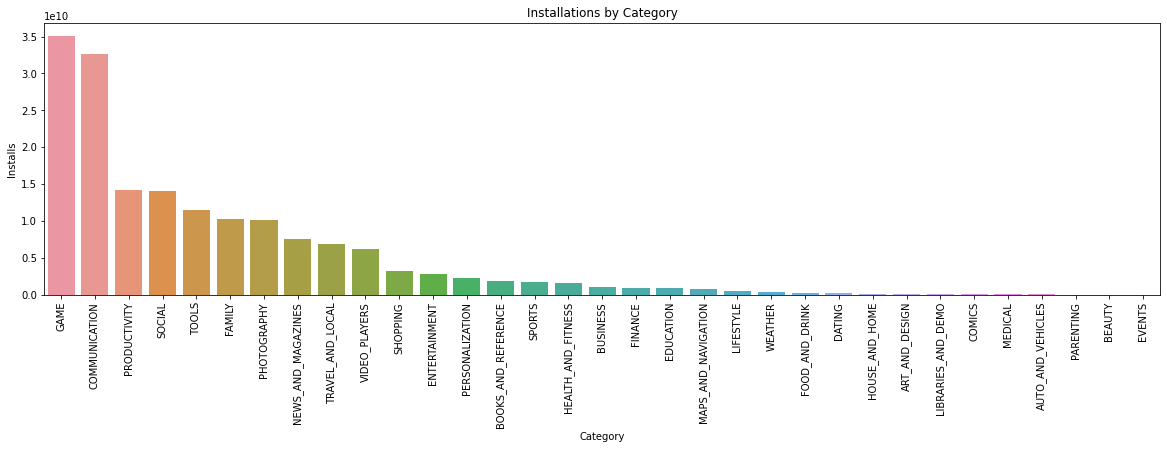

In [49]:
#make a bar plot
install_cat = googleplaystore_df.groupby('Category')['Installs'].sum()
install_cat = pd.DataFrame(install_cat).reset_index()

plt.figure(figsize=(20, 5))
order = googleplaystore_df.groupby(['Category'])['Installs'].sum().sort_values(ascending=False).index
sns.barplot(data=install_cat, x='Category', y='Installs', order=order)
plt.title('Installations by Category')
plt.xticks(rotation=90);

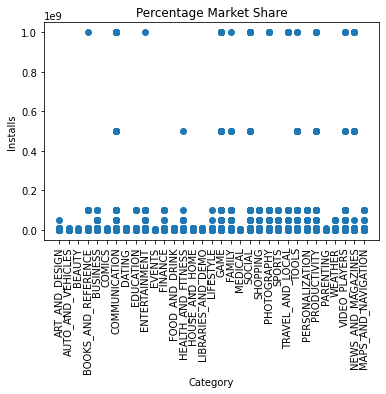

In [34]:
# Visualize the output
# plot the percentage market share
Category = googleplaystore_df["Category"]
Installs = googleplaystore_df["Installs"]
plt.scatter(Category, Installs)
plt.title("Percentage Market Share")
plt.xlabel("Category")
plt.ylabel("Installs")
plt.xticks(rotation = 90)
plt.show()

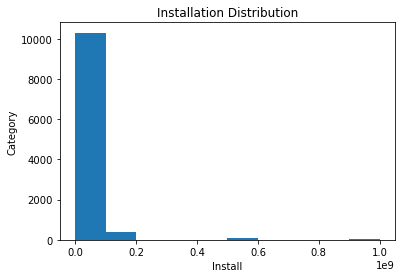

In [46]:
# How is the Installation distributed?
googleplaystore_df["Installs"].plot(kind = 'hist')
plt.title('Installation Distribution')
plt.xlabel('Install')
plt.ylabel('Category')
plt.show()